In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np
import matplotlib.pyplot as plt


Load the DUMD dataset and convert categorical class labels under the ”UNS”
column to numerical values by using the LabelEncoder. ✅

In [ ]:
df_train = pd.read_csv ('/content/DUMD_train.csv')
df_test = pd.read_csv ('/content/DUMD_test.csv')

X_train = df_train.iloc[:,0:5].values
Y_train = df_train.iloc[:,5].values   

X_test = df_test.iloc[:,0:5].values
Y_test = df_test.iloc[:,5].values

le = preprocessing.LabelEncoder() # create the object
le.fit(Y_train) # fit to training data (High: 0, Low: 1, Medium: 2, Very Low: 3)
y_train = le.transform(Y_train) # convert
y_test  = le.transform(Y_test)


data_train=pd.DataFrame(df_train)
data_test=pd.DataFrame(df_test)

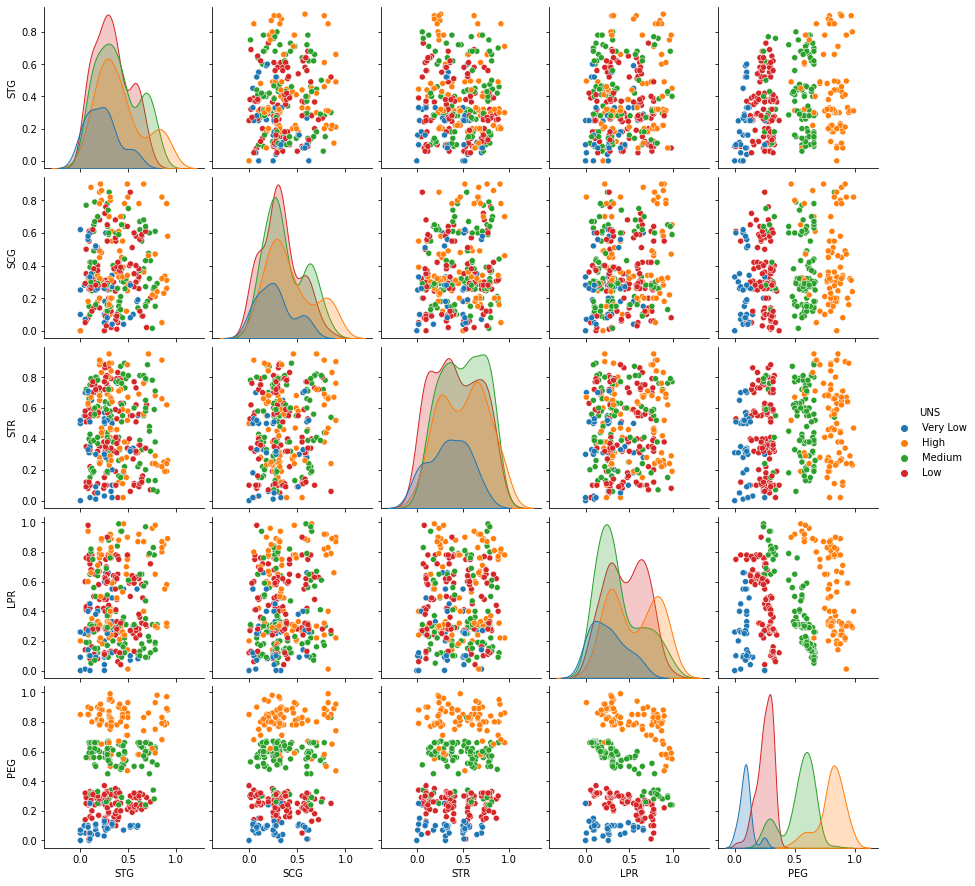

In [ ]:
import seaborn as sns
sns.pairplot(data_train, hue= "UNS")

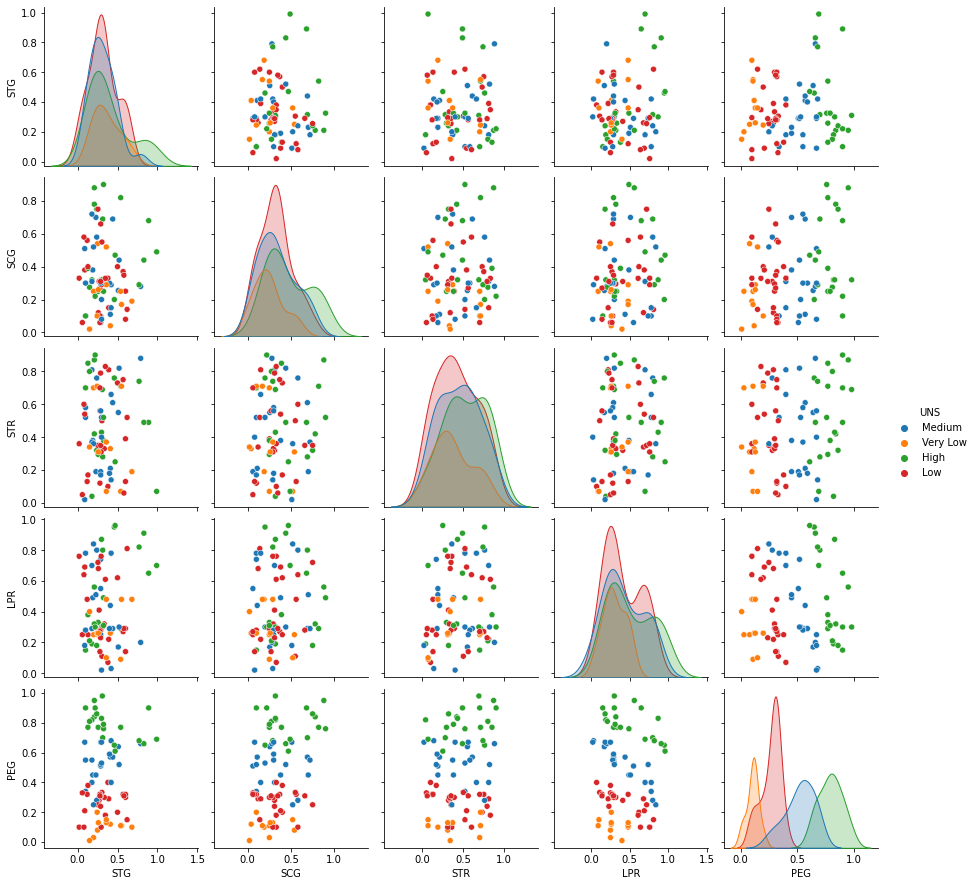

In [ ]:
import seaborn as sns
sns.pairplot(data_test, hue= "UNS")

# New Section

Choose two features from DUMD dataset to apply SVM and Perceptron algorithms for classification.

We calculate Chi-square between each feature & the target & select the desired number of features with best Chi-square scores or the lowest p-values.

The Chi-squared (χ2) test is used in statistics to test the independence of two events. More specifically in feature selection we use it to test whether the occurrence of a specific feature & the target are independent or not.

For each feature & target combination, a corresponding high χ2 chi-square score or a low p-value indicates that the target column is dependent on the feature column.

So, we select the most affecting two features to our data

https://bhattbhavesh91.github.io/chi-square-feature-selection/

In [ ]:
# choose two features
# based on chi square statistical test 
# https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223

x_train = SelectKBest(chi2, k=2).fit_transform(X_train, y_train) # we selected LPR, PEG
x_test  = df_test.iloc[:,3:5].values

print(x_train)
print(x_test)

[[0.    0.   ]
 [0.24  0.9  ]
 [0.65  0.3  ]
 [0.98  0.24 ]
 [0.1   0.66 ]
 [0.29  0.56 ]
 [0.72  0.25 ]
 [0.2   0.85 ]
 [0.3   0.81 ]
 [0.41  0.3  ]
 [0.3   0.6  ]
 [0.35  0.8  ]
 [0.01  0.05 ]
 [0.08  0.33 ]
 [0.27  0.29 ]
 [0.49  0.56 ]
 [0.78  0.2  ]
 [0.12  0.66 ]
 [0.29  0.65 ]
 [0.42  0.28 ]
 [0.76  0.25 ]
 [0.18  0.85 ]
 [0.25  0.1  ]
 [0.45  0.25 ]
 [0.94  0.56 ]
 [0.31  0.59 ]
 [0.65  0.24 ]
 [0.76  0.16 ]
 [0.31  0.78 ]
 [0.43  0.29 ]
 [0.72  0.26 ]
 [0.08  0.33 ]
 [0.26  0.   ]
 [0.2   0.78 ]
 [0.29  0.6  ]
 [0.64  0.25 ]
 [0.27  0.04 ]
 [0.14  0.66 ]
 [0.31  0.62 ]
 [0.71  0.9  ]
 [0.28  0.25 ]
 [0.78  0.05 ]
 [0.42  0.26 ]
 [0.19  0.59 ]
 [0.33  0.82 ]
 [0.75  0.01 ]
 [0.19  0.56 ]
 [0.3   0.51 ]
 [0.48  0.28 ]
 [0.09  0.15 ]
 [0.26  0.24 ]
 [0.29  0.58 ]
 [0.42  0.75 ]
 [0.66  0.08 ]
 [0.33  0.78 ]
 [0.4   0.1  ]
 [0.75  0.1  ]
 [0.1   0.3  ]
 [0.44  0.28 ]
 [0.76  0.24 ]
 [0.12  0.67 ]
 [0.29  0.62 ]
 [0.48  0.26 ]
 [0.7   0.25 ]
 [0.2   0.03 ]
 [0.78  0.18 ]
 [0.09  0.

Plotting the training data

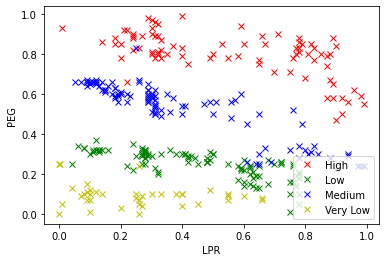

In [ ]:
plt.plot(x_train[y_train==0,0], x_train[y_train==0,1], 'x', color='r', label='High')
plt.plot(x_train[y_train==1,0], x_train[y_train==1,1], 'x', color='g', label='Low')
plt.plot(x_train[y_train==2,0], x_train[y_train==2,1], 'x', color='b', label='Medium')
plt.plot(x_train[y_train==3,0], x_train[y_train==3,1], 'x', color='y', label='Very Low')
plt.xlabel("LPR")
plt.ylabel("PEG")
plt.legend(loc = 'lower right')
plt.show()

Plotting the test data

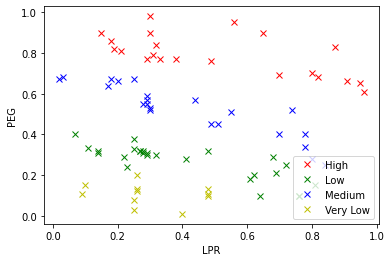

In [ ]:
plt.plot(x_test[y_test==0,0], x_test[y_test==0,1], 'x', color='r', label='High')
plt.plot(x_test[y_test==1,0], x_test[y_test==1,1], 'x', color='g', label='Low')
plt.plot(x_test[y_test==2,0], x_test[y_test==2,1], 'x', color='b', label='Medium')
plt.plot(x_test[y_test==3,0], x_test[y_test==3,1], 'x', color='y', label='Very Low')
plt.xlabel("LPR")
plt.ylabel("PEG")
plt.legend(loc = 'lower right')
plt.show()

# SVM classifier

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf_svm = svm.SVC(kernel='linear', C=200) # Linear Kernel

#Train the model using the training sets
clf_svm.fit(x_train, y_train)

#Predict the response for test dataset
y_pred_svm = clf_svm.predict(x_test)

Function to calculate the accuracy

In [ ]:
def accuracy(x,y):
    '''
    This function calculates accuracy between two arrays
    Input:
        - Two arrays x,y
    Output:
        - Accuracy
    '''
    acc = (x==y).sum() / len(y)
    return acc

Perceptron classifier

In [ ]:
from sklearn.linear_model import Perceptron

clf_perc = Perceptron(tol=1e-3, random_state=0)
clf_perc.fit(x_train, y_train)

y_pred_perceptron= clf_perc.predict(x_test)

Calculating the accuracy of SVM and perceptron

In [ ]:
acc_svm = accuracy(y_test,y_pred_svm)

acc_perceptron = accuracy(y_test,y_pred_perceptron)

print(acc_svm)

print(acc_perceptron)

0.9875
0.6


Confusion matrics for both classifiers

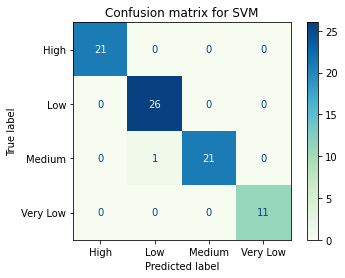

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_perceptron = confusion_matrix(y_test, y_pred_perceptron)

ConfusionMatrixDisplay(cm_svm, display_labels=['High','Low','Medium','Very Low']).plot(cmap='GnBu')
plt.title("Confusion matrix for SVM")
plt.show()

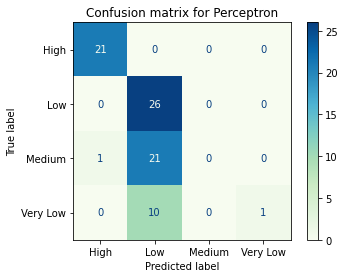

In [ ]:
ConfusionMatrixDisplay(cm_perceptron, display_labels=['High','Low','Medium','Very Low']).plot(cmap='GnBu')
plt.title("Confusion matrix for Perceptron")
plt.show()

Plotting test data in both classifiers

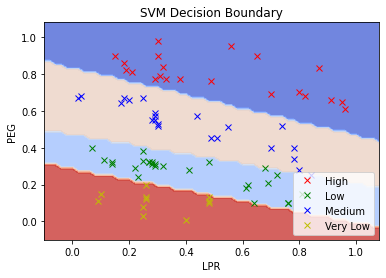

In [ ]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - .1, x.max() + .1
    y_min, y_max = y.min() - .1, y.max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Set-up grid for plotting.
X0, X1 = x_train[:, 0], x_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

fig, ax = plt.subplots()

ax.plot(x_test[y_test==0,0], x_test[y_test==0,1], 'x', color='r', label='High')
ax.plot(x_test[y_test==1,0], x_test[y_test==1,1], 'x', color='g', label='Low')
ax.plot(x_test[y_test==2,0], x_test[y_test==2,1], 'x', color='b', label='Medium')
ax.plot(x_test[y_test==3,0], x_test[y_test==3,1], 'x', color='y', label='Very Low')
ax.set_xlabel("LPR")
ax.set_ylabel("PEG")
ax.legend(loc = 'lower right')

plot_contours(ax, clf_svm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.set_title('SVM Decision Boundary')
plt.show()

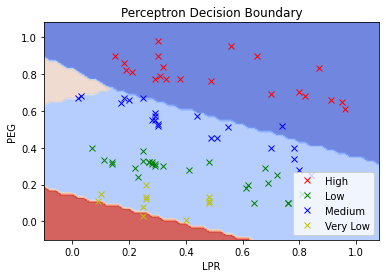

In [ ]:
fig, ax = plt.subplots()

ax.plot(x_test[y_test==0,0], x_test[y_test==0,1], 'x', color='r', label='High')
ax.plot(x_test[y_test==1,0], x_test[y_test==1,1], 'x', color='g', label='Low')
ax.plot(x_test[y_test==2,0], x_test[y_test==2,1], 'x', color='b', label='Medium')
ax.plot(x_test[y_test==3,0], x_test[y_test==3,1], 'x', color='y', label='Very Low')
ax.set_xlabel("LPR")
ax.set_ylabel("PEG")
ax.legend(loc = 'lower right')

plot_contours(ax, clf_perc, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.set_title('Perceptron Decision Boundary')
plt.show()

Build OvR-SVM, test on DUMD testing dataset with obtained features from Problem 

In [ ]:
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

Getting the only desired classes for our 4 classifiers

In [ ]:
y_train_0 =(y_train == 0).astype(int)
y_train_1 =(y_train == 1).astype(int)
y_train_2 =(y_train == 2).astype(int)
y_train_3 =(y_train == 3).astype(int)

y_test_0 =(y_test == 0).astype(int)
y_test_1 =(y_test == 1).astype(int)
y_test_2 =(y_test == 2).astype(int)
y_test_3 =(y_test == 3).astype(int)

print(y_train_0)
print(x_train)

In [ ]:
svm_OVR_0 = svm.SVC(kernel='rbf', probability=True,gamma=5)
svm_OVR_0.fit(x_train, y_train_0)
y_pred_OVR_0 = svm_OVR_0.predict(x_test)
y_prob_0 = svm_OVR_0.predict_proba(x_test)
print(y_prob_0)


svm_OVR_1 = svm.SVC(kernel='rbf', probability=True,gamma=5)
svm_OVR_1.fit(x_train, y_train_1)
y_pred_OVR_1 = svm_OVR_1.predict(x_test)
y_prob_1 = svm_OVR_1.predict_proba(x_test)
print(y_pred_OVR_1)

svm_OVR_2 = svm.SVC(kernel='rbf', probability=True,gamma=5)
svm_OVR_2.fit(x_train, y_train_2)
y_pred_OVR_2 = svm_OVR_2.predict(x_test)
y_prob_2 = svm_OVR_2.predict_proba(x_test)
print(y_pred_OVR_2)

svm_OVR_3 = svm.SVC(kernel='rbf', probability=True,gamma=5)
svm_OVR_3.fit(x_train, y_train_3)
y_pred_OVR_3 = svm_OVR_3.predict(x_test)
y_prob_3 = svm_OVR_3.predict_proba(x_test)
print(y_pred_OVR_3)

In [ ]:
print(accuracy(y_test_0,y_pred_OVR_0))
print(accuracy(y_test_1,y_pred_OVR_1))
print(accuracy(y_test_2,y_pred_OVR_2))
print(accuracy(y_test_3,y_pred_OVR_3))

1.0
0.925
0.975
0.9875


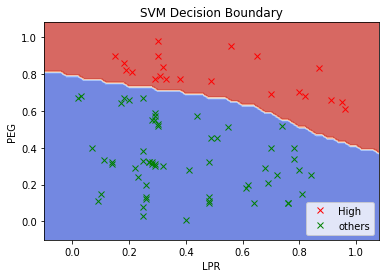

In [ ]:
fig, ax = plt.subplots()

ax.plot(x_test[y_test==0,0], x_test[y_test==0,1], 'x', color='r', label='High')
ax.plot(x_test[y_test!=0,0], x_test[y_test!=0,1], 'x', color='g', label='others')

ax.set_xlabel("LPR")
ax.set_ylabel("PEG")
ax.legend(loc = 'lower right')

plot_contours(ax, svm_OVR_0, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.set_title('SVM Decision Boundary')
plt.show()

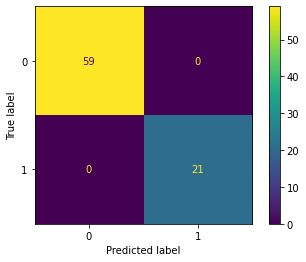

In [ ]:
ConfusionMatrixDisplay.from_estimator(svm_OVR_0,x_test,y_test_0 )

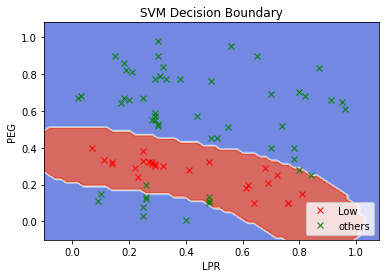

In [ ]:
fig, ax = plt.subplots()

ax.plot(x_test[y_test==1,0], x_test[y_test==1,1], 'x', color='r', label='Low')
ax.plot(x_test[y_test!=1,0], x_test[y_test!=1,1], 'x', color='g', label='others')

ax.set_xlabel("LPR")
ax.set_ylabel("PEG")
ax.legend(loc = 'lower right')

plot_contours(ax, svm_OVR_1, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.set_title('SVM Decision Boundary')
plt.show()

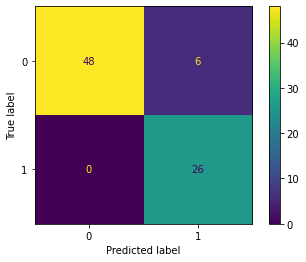

In [ ]:
ConfusionMatrixDisplay.from_estimator(svm_OVR_1,x_test,y_test_1 )

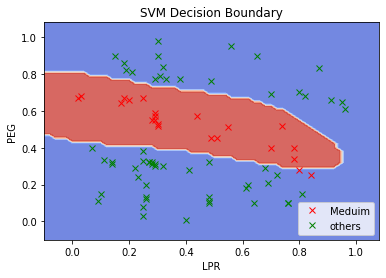

In [ ]:
fig, ax = plt.subplots()

ax.plot(x_test[y_test==2,0], x_test[y_test==2,1], 'x', color='r', label='Meduim')
ax.plot(x_test[y_test!=2,0], x_test[y_test!=2,1], 'x', color='g', label='others')

ax.set_xlabel("LPR")
ax.set_ylabel("PEG")
ax.legend(loc = 'lower right')

plot_contours(ax, svm_OVR_2, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.set_title('SVM Decision Boundary')
plt.show()

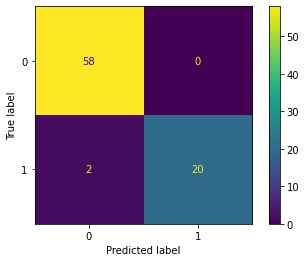

In [ ]:
ConfusionMatrixDisplay.from_estimator(svm_OVR_2,x_test,y_test_2)

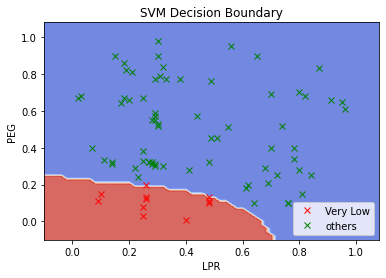

In [ ]:
fig, ax = plt.subplots()

ax.plot(x_test[y_test==3,0], x_test[y_test==3,1], 'x', color='r', label='Very Low')
ax.plot(x_test[y_test!=3,0], x_test[y_test!=3,1], 'x', color='g', label='others')

ax.set_xlabel("LPR")
ax.set_ylabel("PEG")
ax.legend(loc = 'lower right')

plot_contours(ax, svm_OVR_3, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.set_title('SVM Decision Boundary')
plt.show()

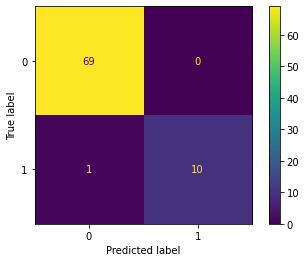

In [ ]:
ConfusionMatrixDisplay.from_estimator(svm_OVR_3,x_test,y_test_3)

In [ ]:
# y_prob_0 # 0: others, 1: 0
# y_prob_1 # 0: others, 1: 1
# y_prob_2 # 0: others, 1: 2
# y_prob_3 # 0: others, 1: 3
y_prob_all = np.array([y_prob_0[:,1],y_prob_1[:,1],y_prob_2[:,1],y_prob_3[:,1]]).T
y_pred_all_ovr = y_prob_all.argmax(1)
print(y_pred_all_ovr )


[2 2 2 3 0 0 2 0 1 2 2 1 0 3 0 1 2 0 1 2 1 1 2 2 2 1 2 0 2 0 0 0 2 0 1 0 1
 3 1 1 2 0 1 2 1 0 1 0 3 1 2 0 1 0 1 3 1 1 2 0 0 1 3 2 1 3 3 3 0 1 1 1 1 2
 2 2 1 3 0 1]


In [ ]:
accuracy(y_test, y_pred_all_ovr)

0.9875

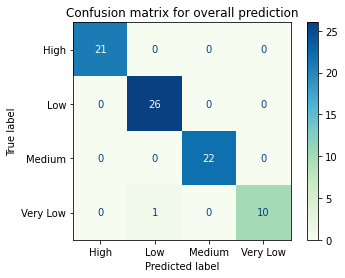

In [ ]:
cm_y_pred_all_ovr = confusion_matrix(y_test, y_pred_all_ovr)
ConfusionMatrixDisplay(cm_y_pred_all_ovr, display_labels=['High','Low','Medium','Very Low']).plot(cmap='GnBu')
plt.title("Confusion matrix for overall prediction")
plt.show()

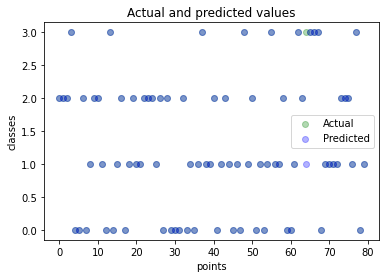

In [ ]:
from math import sqrt

# sqrt(mean_squared_error(y_test, y_pred_all_ovr))

fig, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'green', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred_all_ovr.size), y=y_pred_all_ovr, c = 'blue', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('points')
plt.ylabel('classes')
plt.legend()
plt.show()

Build OvO-SVM, test on DUMD testing dataset with obtained features from
Problem

In [ ]:
# SVM for multi-class classification using built-in one-vs-one
from sklearn.preprocessing import LabelBinarizer

In [ ]:
def binarize_array(arr): 
  '''
  This function converts an array to binary labels
  ''' 
  bin = LabelBinarizer()
  bin.fit(arr)
  new_arr = bin.transform(arr).reshape(-1) # to flatten the array
  return new_arr

In [ ]:
binarize_array(y_train[(y_train==0) | (y_train==1)])

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
y_train_0_1 =binarize_array(y_train[(y_train==0) | (y_train==1)])
y_train_0_2 =binarize_array(y_train[(y_train==0) | (y_train==2)])                                                                   
y_train_0_3 =binarize_array(y_train[(y_train==0) | (y_train==3)])
y_train_1_2 =binarize_array(y_train[(y_train==1) | (y_train==2)])
y_train_1_3 =binarize_array(y_train[(y_train==1) | (y_train==3)])
y_train_2_3 =binarize_array(y_train[(y_train==2) | (y_train==3)])


y_test_0_1 =binarize_array(y_test[(y_test==0) | (y_test==1)])
y_test_0_2 =binarize_array(y_test[(y_test==0) | (y_test==2)])
y_test_0_3 =binarize_array(y_test[(y_test==0) | (y_test==3)])
y_test_1_2 =binarize_array(y_test[(y_test==1) | (y_test==2)])
y_test_1_3 =binarize_array(y_test[(y_test==1) | (y_test==3)])
y_test_2_3 =binarize_array(y_test[(y_test==2) | (y_test==3)])


x_train_0_1 =x_train[(y_train==0) | (y_train==1)]
x_train_0_2 =x_train[(y_train==0) | (y_train==2)]
x_train_0_3 =x_train[(y_train==0) | (y_train==3)]
x_train_1_2 =x_train[(y_train==1) | (y_train==2)]
x_train_1_3 =x_train[(y_train==1) | (y_train==3)]
x_train_2_3 =x_train[(y_train==2) | (y_train==3)]


x_test_0_1 =x_test[(y_test==0) | (y_test==1)]
x_test_0_2 =x_test[(y_test==0) | (y_test==2)]
x_test_0_3 =x_test[(y_test==0) | (y_test==3)]
x_test_1_2 =x_test[(y_test==1) | (y_test==2)]
x_test_1_3 =x_test[(y_test==1) | (y_test==3)]
x_test_2_3 =x_test[(y_test==2) | (y_test==3)]



Test with obtained results from problem 1

In [ ]:
SVM_ONO_0_1 = svm.SVC(kernel ='linear',random_state=0, probability=True , C=50)
SVM_ONO_0_1.fit(x_train_0_1, y_train_0_1)
y_pred_ONO_0_1 = SVM_ONO_0_1.predict(x_test_0_1)


SVM_ONO_0_2 = svm.SVC(kernel ='linear',random_state=0, probability=True , C=50)
SVM_ONO_0_2.fit(x_train_0_2, y_train_0_2)
y_pred_ONO_0_2 = SVM_ONO_0_2.predict(x_test_0_2)

SVM_ONO_0_3 = svm.SVC(kernel ='linear',random_state=0, probability=True , C=50)
SVM_ONO_0_3.fit(x_train_0_3, y_train_0_3)
y_pred_ONO_0_3 = SVM_ONO_0_3.predict(x_test_0_3)


SVM_ONO_1_2 = svm.SVC(kernel ='linear',random_state=0, probability=True , C=50)
SVM_ONO_1_2.fit(x_train_1_2, y_train_1_2)
y_pred_ONO_1_2 = SVM_ONO_1_2.predict(x_test_1_2)


SVM_ONO_1_3 = svm.SVC(kernel ='linear',random_state=0, probability=True , C=50)
SVM_ONO_1_3.fit(x_train_1_3, y_train_1_3)
y_pred_ONO_1_3 = SVM_ONO_1_3.predict(x_test_1_3)


SVM_ONO_2_3 = svm.SVC(kernel ='linear',random_state=0, probability=True , C=50)
SVM_ONO_2_3.fit(x_train_2_3, y_train_2_3)
y_pred_ONO_2_3 = SVM_ONO_2_3.predict(x_test_2_3)




In [ ]:
print(accuracy(y_test_0_1,y_pred_ONO_0_1))
print(accuracy(y_test_0_2,y_pred_ONO_0_2))
print(accuracy(y_test_0_3,y_pred_ONO_0_3))
print(accuracy(y_test_1_2,y_pred_ONO_1_2))
print(accuracy(y_test_1_3,y_pred_ONO_1_3))
print(accuracy(y_test_2_3,y_pred_ONO_2_3))

1.0
1.0
1.0
1.0
0.9459459459459459
1.0


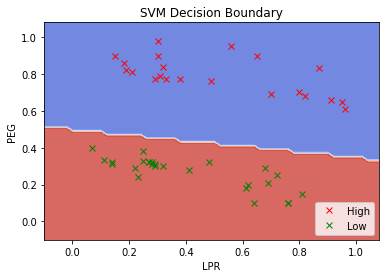

In [ ]:
fig, ax = plt.subplots()

ax.plot(x_test[y_test==0,0], x_test[y_test==0,1], 'x', color='r', label='High')
ax.plot(x_test[y_test==1,0], x_test[y_test==1,1], 'x', color='g', label='Low')

ax.set_xlabel("LPR")
ax.set_ylabel("PEG")
ax.legend(loc = 'lower right')

plot_contours(ax, SVM_ONO_0_1, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.set_title('SVM Decision Boundary')
plt.show()

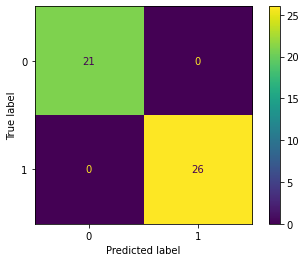

In [ ]:
ConfusionMatrixDisplay.from_estimator(SVM_ONO_0_1,x_test_0_1,y_test_0_1 )

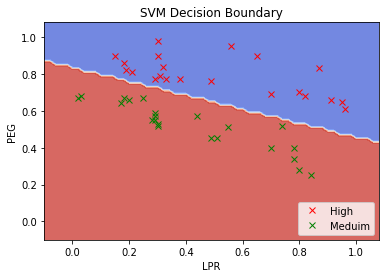

In [ ]:
fig, ax = plt.subplots()

ax.plot(x_test[y_test==0,0], x_test[y_test==0,1], 'x', color='r', label='High')
ax.plot(x_test[y_test==2,0], x_test[y_test==2,1], 'x', color='g', label='Meduim')

ax.set_xlabel("LPR")
ax.set_ylabel("PEG")
ax.legend(loc = 'lower right')

plot_contours(ax, SVM_ONO_0_2, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.set_title('SVM Decision Boundary')
plt.show()

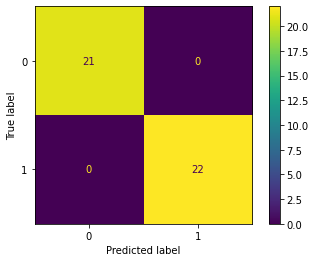

In [ ]:
ConfusionMatrixDisplay.from_estimator(SVM_ONO_0_2,x_test_0_2,y_test_0_2 )

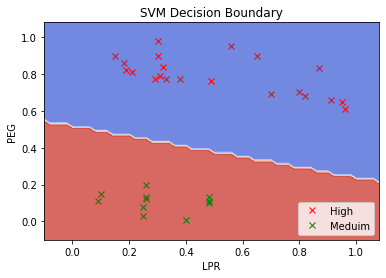

In [ ]:
fig, ax = plt.subplots()

ax.plot(x_test[y_test==0,0], x_test[y_test==0,1], 'x', color='r', label='High')
ax.plot(x_test[y_test==3,0], x_test[y_test==3,1], 'x', color='g', label='Meduim')

ax.set_xlabel("LPR")
ax.set_ylabel("PEG")
ax.legend(loc = 'lower right')

plot_contours(ax, SVM_ONO_0_3, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.set_title('SVM Decision Boundary')
plt.show()

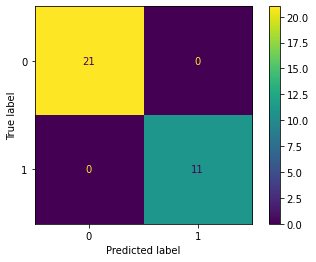

In [ ]:
ConfusionMatrixDisplay.from_estimator(SVM_ONO_0_3,x_test_0_3,y_test_0_3 )

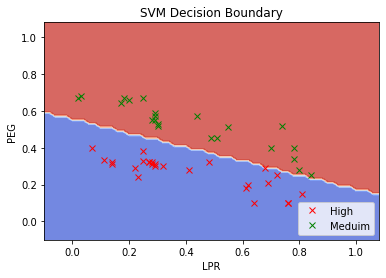

In [ ]:
fig, ax = plt.subplots()

ax.plot(x_test[y_test==1,0], x_test[y_test==1,1], 'x', color='r', label='High')
ax.plot(x_test[y_test==2,0], x_test[y_test==2,1], 'x', color='g', label='Meduim')

ax.set_xlabel("LPR")
ax.set_ylabel("PEG")
ax.legend(loc = 'lower right')

plot_contours(ax, SVM_ONO_1_2, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.set_title('SVM Decision Boundary')
plt.show()

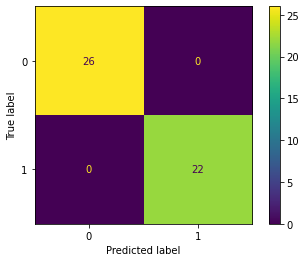

In [ ]:
ConfusionMatrixDisplay.from_estimator(SVM_ONO_1_2,x_test_1_2,y_test_1_2 )

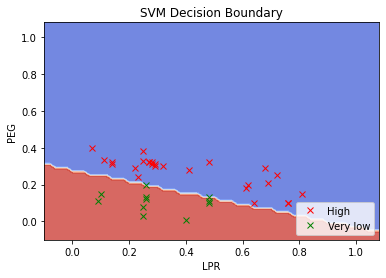

In [ ]:
fig, ax = plt.subplots()

ax.plot(x_test[y_test==1,0], x_test[y_test==1,1], 'x', color='r', label='High')
ax.plot(x_test[y_test==3,0], x_test[y_test==3,1], 'x', color='g', label='Very low')

ax.set_xlabel("LPR")
ax.set_ylabel("PEG")
ax.legend(loc = 'lower right')

plot_contours(ax, SVM_ONO_1_3, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.set_title('SVM Decision Boundary')
plt.show()

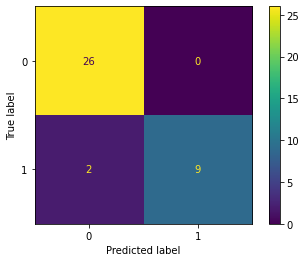

In [ ]:
ConfusionMatrixDisplay.from_estimator(SVM_ONO_1_3,x_test_1_3,y_test_1_3 )

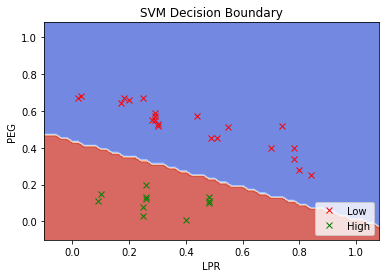

In [ ]:
fig, ax = plt.subplots()

ax.plot(x_test[y_test==2,0], x_test[y_test==2,1],'x', color='r', label='Low')
ax.plot(x_test[y_test==3,0], x_test[y_test==3,1],'x', color='g', label='High')

ax.set_xlabel("LPR")
ax.set_ylabel("PEG")
ax.legend(loc = 'lower right')

plot_contours(ax, SVM_ONO_2_3, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.set_title('SVM Decision Boundary')
plt.show()

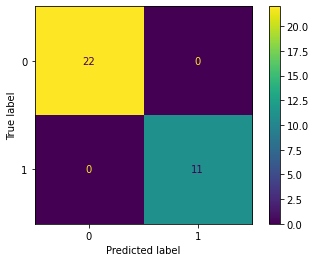

In [ ]:
ConfusionMatrixDisplay.from_estimator(SVM_ONO_2_3,x_test_2_3,y_test_2_3 )

In [ ]:
ytest_all_0_1 = SVM_ONO_0_1.predict_proba(x_test)
ytest_all_0_2 = SVM_ONO_0_2.predict_proba(x_test)
ytest_all_0_3 = SVM_ONO_0_3.predict_proba(x_test)
ytest_all_1_2 = SVM_ONO_1_2.predict_proba(x_test)
ytest_all_1_3 = SVM_ONO_1_3.predict_proba(x_test)
ytest_all_2_3 = SVM_ONO_2_3.predict_proba(x_test)

print(ytest_all_0_1)
print(y_test_0_1)

[[9.10154215e-01 8.98457854e-02]
 [1.29346820e-01 8.70653180e-01]
 [8.77037880e-01 1.22962120e-01]
 [2.08900939e-07 9.99999791e-01]
 [9.92066925e-01 7.93307500e-03]
 [9.87064381e-01 1.29356187e-02]
 [3.37790505e-01 6.62209495e-01]
 [9.97783956e-01 2.21604400e-03]
 [1.68753028e-02 9.83124697e-01]
 [8.05507951e-01 1.94492049e-01]
 [3.50498757e-01 6.49501243e-01]
 [4.23209594e-02 9.57679041e-01]
 [9.95362626e-01 4.63737426e-03]
 [9.80911027e-07 9.99999019e-01]
 [9.91121965e-01 8.87803523e-03]
 [4.21459574e-02 9.57854043e-01]
 [2.66357800e-01 7.33642200e-01]
 [9.92219970e-01 7.78003026e-03]
 [6.94014815e-03 9.93059852e-01]
 [6.46453218e-01 3.53546782e-01]
 [1.19682471e-02 9.88031753e-01]
 [1.89685280e-02 9.81031472e-01]
 [9.18462617e-01 8.15373827e-02]
 [7.30816686e-01 2.69183314e-01]
 [7.97585335e-01 2.02414665e-01]
 [4.67998914e-03 9.95320011e-01]
 [6.49267258e-01 3.50732742e-01]
 [9.94719296e-01 5.28070370e-03]
 [4.89007825e-02 9.51099217e-01]
 [9.99713738e-01 2.86262193e-04]
 [9.977354

In [ ]:
ytest_all_ovo = np.array([ytest_all_0_1[:,0]+ytest_all_0_2[:,0]+ytest_all_0_3[:,0], # class 0
          ytest_all_1_2[:,0]+ytest_all_1_3[:,0]+ytest_all_0_1[:,1], # class 1
          ytest_all_1_2[:,1]+ytest_all_0_2[:,1]+ytest_all_2_3[:,0], # class 2
          ytest_all_0_3[:,1]+ytest_all_1_3[:,1]+ytest_all_2_3[:,1]]).T # class 3
ytest_preds_ovo = ytest_all_ovo.argmax(1)

In [ ]:
ytest_preds_ovo

array([2, 2, 2, 3, 0, 0, 2, 0, 1, 2, 2, 1, 0, 3, 0, 1, 2, 0, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 1, 3, 1, 1, 2, 0, 1, 2,
       1, 0, 1, 0, 3, 1, 2, 0, 1, 0, 1, 3, 1, 1, 2, 0, 0, 1, 3, 2, 1, 1,
       3, 3, 0, 1, 1, 1, 1, 2, 2, 2, 1, 3, 0, 1])

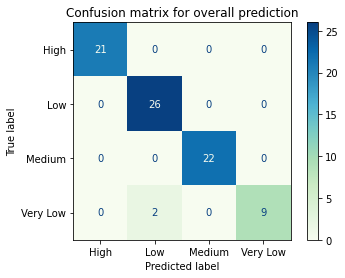

In [ ]:
cm_y_pred_all_ovr = confusion_matrix(y_test, ytest_preds_ovo)
ConfusionMatrixDisplay(cm_y_pred_all_ovr, display_labels=['High','Low','Medium','Very Low']).plot(cmap='GnBu')
plt.title("Confusion matrix for overall prediction")
plt.show()

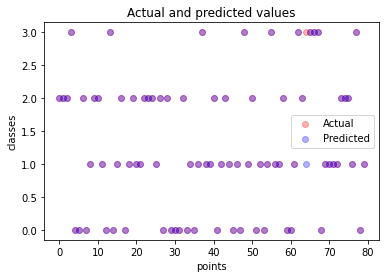

In [ ]:
from math import sqrt


# sqrt(mean_squared_error(y_test, y_pred_all_ovr))

fig, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'red', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, ytest_preds_ovo.size), y=y_pred_all_ovr, c = 'blue', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('points')
plt.ylabel('classes')
plt.legend()
plt.show()